# Filtros de Imagem

Filtros de imagem são ferramentas essenciais em visão computacional e processamento de imagens. Eles são usados para várias finalidades, como realçar características, reduzir ruídos, detectar bordas, etc.

Filtros aplicam uma operação matemática sobre um grupo de pixels (vizinhança) em uma imagem para produzir um novo valor de pixel. Eles são geralmente representados por matrizes chamadas "kernels".

## Operação de Convolução
A convolução é uma operação matemática utilizada para aplicar filtros a uma imagem. A operação de convolução envolve passar o kernel sobre a imagem, calculando a soma ponderada dos pixels cobertos pelo kernel.

A operação de convolução pode ser descrita da seguinte maneira:
1. Posicione o kernel sobre a imagem de modo que o centro do kernel esteja alinhado com um pixel específico.
2. Multiplique cada valor no kernel pelo valor do pixel correspondente na imagem.
3. Some todos os produtos obtidos no passo anterior.
4. O valor resultante é atribuído ao pixel central na imagem de saída.
5. Repita o processo para cada pixel na imagem.

Matematicamente, a convolução para uma imagem $I$ e um kernel $K$ pode ser descrita como:

$(I * K)(i, j) = \sum_{m} \sum_{n} I(i+m, j+n) \cdot K(m, n)$

onde $i$ e $j$ são as coordenadas do pixel na imagem de saída, e $m$ e $n$ são os índices dos elementos do kernel.

### Exemplo de Kernel
Um kernel 3x3 para suavização (média) pode ser representado da seguinte forma:

$K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

### Aplicando Filtros

Vamos implementar uma função chamada `apply_filter` que recebe uma imagem e um kernel, e aplica o filtro na imagem utilizando convolução.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Definindo uma função auxiliar para exibir imagens
def show_image(img, title='Image', cmap_type='gray', figsize=(4, 4), vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap_type, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
def apply_filter(image, kernel):
    # Obtendo as dimensões da imagem e do kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculando as bordas para o padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Aplicando padding na imagem
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Inicializando a imagem filtrada
    filtered_image = np.zeros_like(image)

    # Aplicando a convolução
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            filtered_value = np.sum(region * kernel)
            filtered_image[i, j] = np.clip(filtered_value, 0, 255)

    return filtered_image

### Filtro de Suavização (Blur)

Um kernel 3x3 para suavização (média) pode ser representado da seguinte forma:

$K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

Vamos aplicar um filtro de suavização utilizando um kernel 3x3 para calcular a média dos pixels vizinhos.

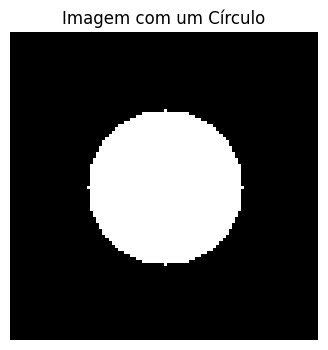

In [ ]:
circle_image = np.zeros((100, 100), dtype=np.uint8)
center = (50, 50)
radius = 25

for y in range(100):
    for x in range(100):
        dist = (x - center[0])**2 + (y - center[1])**2
        if dist <= radius**2:
            circle_image[y, x] = 255

show_image(circle_image, title='Imagem com um Círculo')

Kernel de Suavização (Blur):
[[0.111 0.111 0.111]
 [0.111 0.111 0.111]
 [0.111 0.111 0.111]]


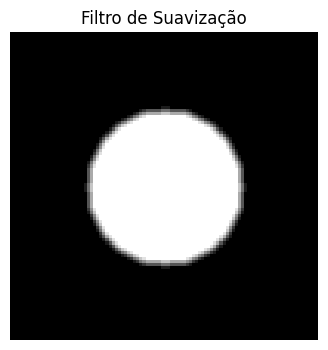

In [ ]:
blur_kernel = np.ones((3, 3)) / 9

np.set_printoptions(precision=3, suppress=True)

print("Kernel de Suavização (Blur):")
print(blur_kernel)

blurred_circle = apply_filter(circle_image, blur_kernel)

show_image(blurred_circle, title='Filtro de Suavização')

### Filtro de Detecção de Bordas (Sobel)

O filtro de Sobel é utilizado para detecção de bordas em imagens, destacando mudanças abruptas de intensidade. Existem dois tipos principais de filtros de Sobel: o filtro horizontal e o filtro vertical.

Um kernel Sobel para detecção de bordas horizontais $K_x$ pode ser representado da seguinte forma:

$K_x = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{bmatrix}$

Para detecção de bordas verticais $K_y$, o kernel Sobel é:

$K_y = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix}$

Vamos aplicar os filtros Sobel para detectar bordas horizontais e verticais na imagem Lenna.

In [ ]:
# Caso a pasta 'data' não exista, crie-a e faça o download da imagem
import os

os.makedirs('data', exist_ok=True)
!curl -o data/lenna.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k  100  462k    0     0   866k      0 --:--:-- --:--:-- --:--:--  864k


In [ ]:
lenna = cv2.imread('data/lenna.png')
lenna_gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)

Kernel Sobel para detecção de bordas horizontais (Sobel X):
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


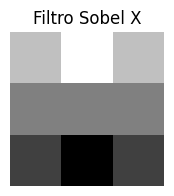

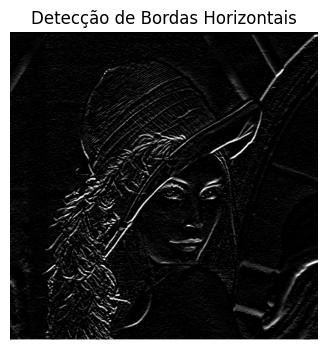

In [ ]:
sobel_x_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

print("Kernel Sobel para detecção de bordas horizontais (Sobel X):")
print(sobel_x_kernel)

sobel_x_lenna = apply_filter(lenna_gray, sobel_x_kernel)

show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_lenna, title='Detecção de Bordas Horizontais')

Kernel Sobel para detecção de bordas verticais (Sobel Y):
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


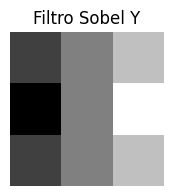

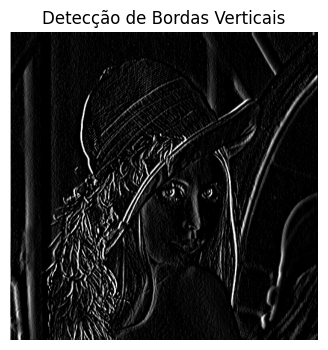

In [ ]:
sobel_y_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print("Kernel Sobel para detecção de bordas verticais (Sobel Y):")
print(sobel_y_kernel)

sobel_y_lenna = apply_filter(lenna_gray, sobel_y_kernel)

show_image(sobel_y_kernel, title='Filtro Sobel Y', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_y_lenna, title='Detecção de Bordas Verticais')

Kernel Sobel para nitidez (Sobel Y):
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


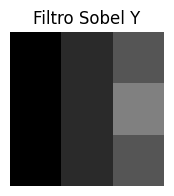

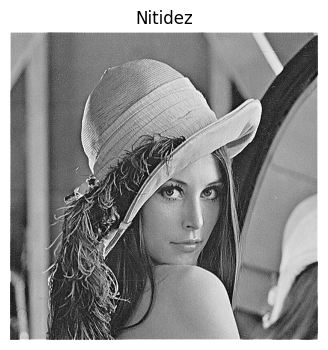

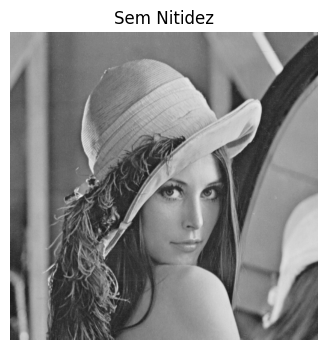

In [ ]:
kernel_nitidez = np.array([[0, -1,  0],[-1,  5, -1],[0, -1,  0]])

print("Kernel Sobel para nitidez (Sobel Y):")
print(kernel_nitidez)

sobel_y_lenna = apply_filter(lenna_gray, kernel_nitidez)

show_image(sobel_y_kernel, title='Filtro Sobel Y', vmin=-1, vmax=5, figsize=(2, 2))
show_image(sobel_y_lenna, title='Nitidez')
show_image(lenna_gray, title='Sem Nitidez')


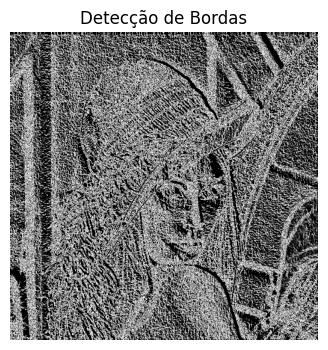

In [ ]:
# Calculando a magnitude do gradiente
sobel_lenna = np.sqrt(sobel_x_lenna**2 + sobel_y_lenna**2)
sobel_lenna = (sobel_lenna / sobel_lenna.max()) * 255
sobel_lenna = sobel_lenna.astype(np.uint8)

show_image(sobel_lenna, title='Detecção de Bordas')

#### Direção do Gradiente (Quiver)
Vamos visualizar a direção do gradiente utilizando um gráfico de vetores (quiver). Isso nos ajudará a entender a orientação das bordas detectadas pelo filtro Sobel.

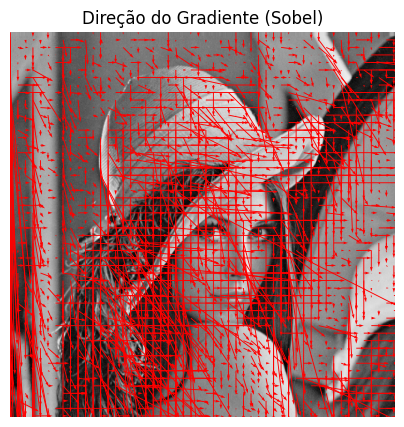

In [ ]:
direction = np.arctan2(sobel_y_lenna, sobel_x_lenna)

# Plotar os vetores de gradiente
step = 10

plt.figure(figsize=(5, 5))
plt.imshow(lenna_gray, cmap='gray')

y, x = np.mgrid[0:lenna_gray.shape[0]:step, 0:lenna_gray.shape[1]:step]
u = sobel_x_lenna[::step, ::step]
v = sobel_y_lenna[::step, ::step]

plt.quiver(x, y, u, v, color='red', angles='xy', scale_units='xy', scale=1, minlength=0.1)

plt.title('Direção do Gradiente (Sobel)')
plt.axis('off')
plt.show()

## Exercícios
Agora é sua vez!

### Exercício 1

O filtro de realce (sharpen) é utilizado para aumentar a nitidez de uma imagem, destacando bordas e detalhes finos. A lógica por trás do kernel de realce envolve a aplicação de valores negativos aos pixels vizinhos e um valor positivo central elevado, o que enfatiza as transições de intensidade. Um exemplo de kernel de realce é:

$K_{sharpen} = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{bmatrix}$

Já o filtro de relevo (emboss) cria um efeito de relevo na imagem, fazendo com que pareça que a imagem está em alto-relevo. A lógica por trás do kernel de emboss é utilizar uma combinação de valores negativos e positivos, que simula sombras e realces. Um exemplo de kernel de emboss é:

$K_{emboss} = \begin{bmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2 \\
\end{bmatrix}$

1. Aplique o filtro de realce (sharpen) à imagem Lenna e observe como ele aumenta a nitidez da imagem.
2. Aplique o filtro de relevo (emboss) à imagem Lenna e observe o efeito de relevo criado.
3. Plote as imagens resultantes após a aplicação de cada filtro.

Kernel sharpen para Realce (sharpen Y):
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


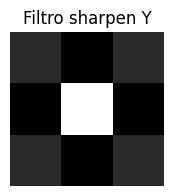

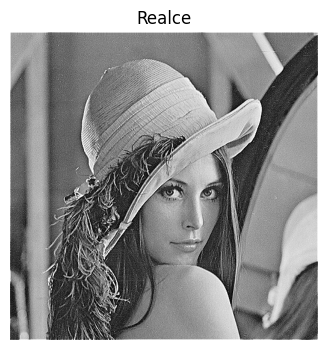

Kernel emboss para Relevo (Sobel Y):
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]


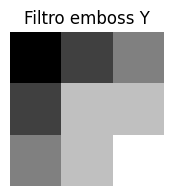

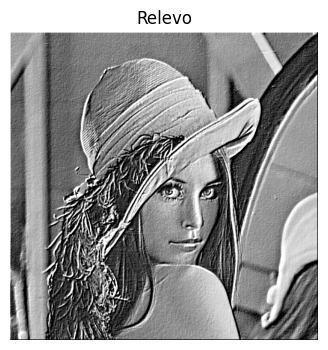

In [ ]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
emboss_kernel = np.array([[-2, -1, 0], [-1, 1 , 1], [0, 1 , 2]])

print("Kernel sharpen para Realce (sharpen Y):")
print(sharpen_kernel)

sharpen_y_lenna = apply_filter(lenna_gray, sharpen_kernel)

show_image(sharpen_kernel, title='Filtro sharpen Y', vmin=-1, vmax=5, figsize=(2, 2))
show_image(sharpen_y_lenna, title='Realce')

print("Kernel emboss para Relevo (Sobel Y):")
print(emboss_kernel)

emboss_y_lenna = apply_filter(lenna_gray, emboss_kernel)

show_image(emboss_kernel, title='Filtro emboss Y', vmin=-2, vmax=2, figsize=(2, 2))
show_image(emboss_y_lenna, title='Relevo')

### Exercício 2
Escolha um dos filtros vistos aqui e aplique-o para uma imagem em RGB.

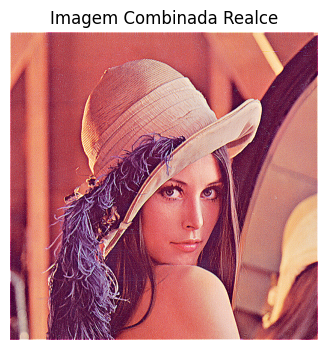

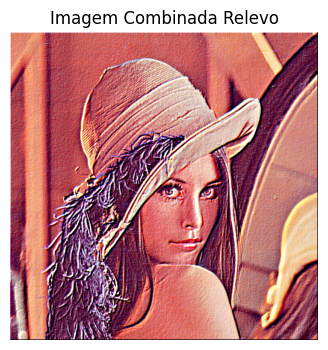

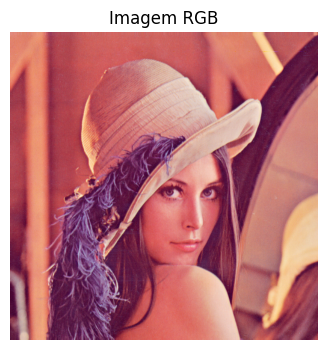

In [ ]:
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
emboss_kernel = np.array([[-2, -1, 0], [-1, 1 , 1], [0, 1 , 2]])

r = lenna_rgb[:, :, 0]
g = lenna_rgb[:, :, 1]
b = lenna_rgb[:, :, 2]

sharpen_r_lenna = apply_filter(r, sharpen_kernel)
sharpen_g_lenna = apply_filter(g, sharpen_kernel)
sharpen_b_lenna = apply_filter(b, sharpen_kernel)

emboss_r_lenna = apply_filter(r, emboss_kernel)
emboss_g_lenna = apply_filter(g, emboss_kernel)
emboss_b_lenna = apply_filter(b, emboss_kernel)


# Combinando os canais
combined_image_sharpen = np.stack([sharpen_r_lenna, sharpen_g_lenna, sharpen_b_lenna], axis=-1)
combined_image_emboss = np.stack([emboss_r_lenna, emboss_g_lenna, emboss_b_lenna], axis=-1)

show_image(combined_image_sharpen, title='Imagem Combinada Realce')
show_image(combined_image_emboss, title='Imagem Combinada Relevo')
show_image(lenna_rgb, title='Imagem RGB')